## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due November 14, 2021 by 11:59 PM
### <span style="color: red">Julia Combs</span>

Copyright &copy; 2021, University of Washington

<hr>

In [41]:
import math 
import scipy
import scipy.ndimage
import scipy.integrate as spi
import numpy as np
from numpy.linalg import eig
import sympy as sp
sp.init_printing(use_latex = 'mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the 
approximations get better and better. 

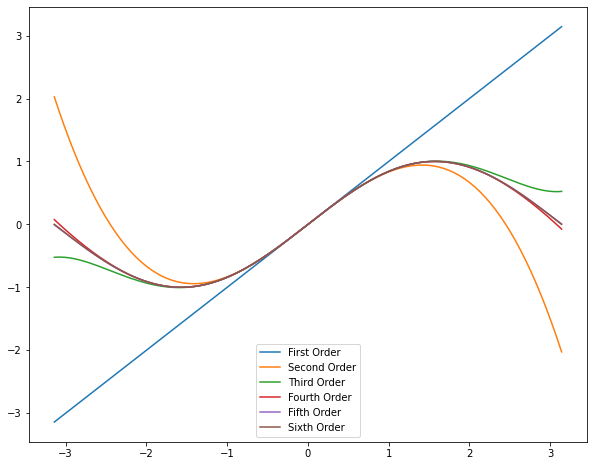

In [27]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Second Order', 'Third Order', 'Fourth Order', 'Fifth Order', 'Sixth Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(6), labels):
    y = y + ((-1)**n *(x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)
    
plt.legend()

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. 

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

### 3. Equilibria Points and Linearization

For each of the
following systems:
(i) find the equilibria, 
(ii) linearize the system around each equilibrium and find the eigenvalues, and
(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. 
For what values of $k$ is the system stable? 

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

$
A =
\begin{pmatrix}
k & -k\\
1 & k-1 \\
\end{pmatrix}
$

$\lvert A - I\lambda \rvert  = 
\begin{pmatrix} 
k - \lambda & -k \\
1 & k - 1 - \lambda \\
\end{pmatrix} $

The characteristic polynomial:

$\lambda^2 + (1-k)\lambda + (k^2 + k) = 0$

Use the quadratic formula to solve for the eigenvalues of $A$.

$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

$\lambda_1 = \frac{-(1-2k) + \sqrt{(1-2k)^2 - 4(1)(k^2)}}{2(1)} \longrightarrow \lambda_1 = \frac{(2k-1) + \sqrt{1-4k}}{2}$

$\lambda_2 = \frac{-(1-2k) - \sqrt{(1-2k)^2 - 4(1)(k^2)}}{2(1)} \longrightarrow \lambda_2 = \frac{(2k-1) - \sqrt{1-4k}}{2}$

These eigenvalues are concurent with the solution provided by python below. 

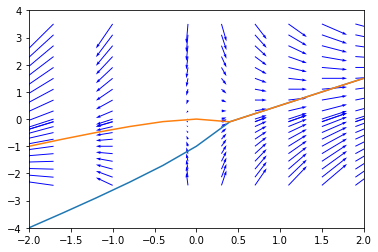

In [165]:
k = sp.Symbol('k')
A = sp.Matrix([[k, -k],[1, k-1]])


Aeig = A.eigenvals()
Aeig

keys_list = list(Aeig)
keys_list[0]

k1 = np.linspace(-4,4,21)

# Aeig.subs(k, k1)

#fig, ax = plt.subplots(2,3)

lam1 = np.zeros((len(k1), 1), dtype = complex)
lam2 = np.zeros((len(k1), 1), dtype = complex)
for i in range(len(k1)):
    w1 = keys_list[0].subs(k,k1[i])
    w2 = keys_list[1].subs(k,k1[i])
    lam1[i] = w1
    lam2[i] = w2
    
# lam1, lam2

lam1Real = np.real(lam1)
lam2Real = np.real(lam2)

fig1, ax = plt.subplots()
ax.set_xlim(-2,2)
ax.set_ylim(-4,4)

Y1, Y2 = np.meshgrid(lam1Real, lam2Real)

Q = plt.quiver(Y1, Y2, Y1, Y1-Y2, color = 'b', scale=5,angles='xy',scale_units='xy')


plt.plot(k1, lam1Real)
plt.plot(k1, lam2Real)
plt.show();


https://math24.net/linear-autonomous-systems-equilibrium-points.html

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points. 

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

In [140]:
w1, w2, w3 = sp.symbols('w1, w2, w3')
A = sp.Matrix([[0, -w3, w2], [w3, 0, -w1], [-w2, w1, 0]])

#### 5a

In [151]:
if A.T == -1*A:
    print('A^T = -A, skew symmetry')
else:
    print('Not skew symmetric')
    

A^T = -A, skew symmetry


#### 5b

Find $x$ such that $Ax = 0$.

In [163]:
Aeig = A.eigenvals()

eigvals = list(Aeig) 

eigvects = A.eigenvects()
eigvects = list(eigvects)
eigvals, eigvects

⎛                                                      ⎡                ⎛     
⎜                                                      ⎢                ⎜     
⎜                                                      ⎢                ⎜     
⎜                                                      ⎢⎛      ⎡⎡w₁⎤⎤⎞  ⎜     
⎜                                                      ⎢⎜      ⎢⎢──⎥⎥⎟  ⎜     
⎜⎡    ___________________     ___________________   ⎤  ⎢⎜      ⎢⎢w₃⎥⎥⎟  ⎜    _
⎜⎢   ╱     2     2     2     ╱     2     2     2    ⎥  ⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜   ╱ 
⎜⎣-╲╱  - w₁  - w₂  - w₃  , ╲╱  - w₁  - w₂  - w₃  , 0⎦, ⎢⎜0, 1, ⎢⎢w₂⎥⎥⎟, ⎜-╲╱  
⎜                                                      ⎢⎜      ⎢⎢──⎥⎥⎟  ⎜     
⎜                                                      ⎢⎜      ⎢⎢w₃⎥⎥⎟  ⎜     
⎜                                                      ⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜     
⎜                                                      ⎢⎝      ⎣⎣1 ⎦⎦⎠  ⎜     
⎜                                                   

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. 

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

### 7. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 